In [45]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import numpy as np
import os

In [46]:
plt.rc('legend', fontsize=9)
#plt.rc('text', usetex=True)

In [47]:
dt = 0.1
ms_to_index = lambda ms: int(ms / dt)
index_to_ms = lambda ind: ind * dt
threshold = -25

In [48]:
def get_frequencies(spike_trains):
    # Extract spike times via voltage threshold
    spike_times = []
    for spike_train in spike_trains:
        current_spike_times = []
        for i in range(spike_train.size-1):
            if spike_train[i] < threshold and spike_train[i+1] >= threshold:
                current_spike_times.append(index_to_ms(i))
        spike_times.append(np.array(current_spike_times))
    
    # Durations between spikes and spiking frequencies
    durations = [times[1:] - times[:-1] for times in spike_times]  # time between spikes, ms
    frequencies = [1000. / d for d in durations]  # Hz
    
    return map(np.mean, frequencies), map(sp.stats.sem, frequencies)

In [49]:
# increasing.dat (XPP)
spike_trains_increasing = []
t, v = np.genfromtxt('increasing.dat').transpose()[:2]
start = ms_to_index(3050)
while start < len(v):
    spike_trains_increasing.append(v[start:start+ms_to_index(400)])  # trim 50 ms at start and end, respectively
    start += ms_to_index(500)
    
frequencies_increasing = get_frequencies(spike_trains_increasing)[0]
currents_increasing = np.array([-1.9, -1, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 59])

In [50]:
# decreasing.dat (XPP)
spike_trains_decreasing = []
t, v = np.genfromtxt('decreasing.dat').transpose()[:2]
start = ms_to_index(550)
while start < len(v):
    spike_trains_decreasing.append(v[start:start+ms_to_index(400)])  # trim 50 ms at start and end, respectively
    start += ms_to_index(500)
    
frequencies_decreasing = get_frequencies(spike_trains_decreasing)[0]
currents_decreasing = np.array([-2.2, -2.5, -2.72])

In [52]:
# fit power law
all_currents = np.concatenate((currents_increasing, currents_decreasing))
all_frequencies = np.concatenate((frequencies_increasing, frequencies_decreasing))
fit = np.poly1d(np.polyfit(all_currents+12, all_frequencies, 4))

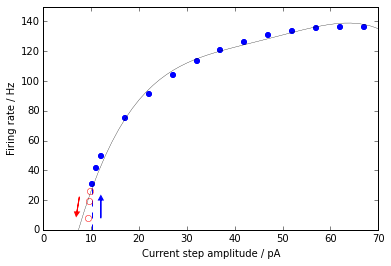

In [53]:
#plt.axvline(-1.90+12, label="Rheobase (silence -> tonic)", color='b', alpha=0.6)
#plt.text(11.4, 120, '10.10 pA', color='b', rotation=90)
plt.errorbar(currents_increasing+12, frequencies_increasing, fmt='bo', capsize=7, label="Mean firing rate for\nincreasing current steps", markeredgecolor='none')  # yerr=sem_frequencies
plt.arrow(12, 8, 0, 12, head_width=1, head_length=3, fc='b', ec='b')

plt.vlines(currents_increasing[0]+12, 0, frequencies_increasing[0], 'b', 'dashed')

# Plot frequencies for decreasing current steps in the same plot as for increasing current steps
#plt.axvline(-2.73+12, label="Rheobase (tonic -> silence)", color='g', alpha=0.6)
#plt.text(6.5, 120, '9.27 pA', color='b', rotation=90)
plt.errorbar(currents_decreasing+12, frequencies_decreasing, fmt='o', capsize=7, label="Mean firing rate for\ndecreasing current steps", markeredgecolor='r', markerfacecolor='none')  # yerr=sem_frequencies_2
plt.arrow(7.5, 22, -0.5, -10, head_width=1, head_length=3, fc='r', ec='r')

plt.ylim(0, 150)
plt.xlim(0, 70)
plt.xlabel('Current step amplitude / pA')
plt.ylabel('Firing rate / Hz')
#plt.legend(loc='lower right', numpoints=1, borderaxespad=3, frameon=False)


x = np.linspace(0, 70)
plt.plot(x, fit(x), 'black', linewidth=0.3)

plt.savefig("f-I-curve.png", dpi=300)